# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
# loading the dataset
df= pd.read_csv("USA_Housing.csv")

### Check the shape of the dataset

In [36]:
# checking the shape of the dataset
df.shape

(5000, 7)

* The housing dataset contains 5000 rows with 7 columns

### Get the info regarding column datatypes

In [37]:
# checking the structure of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


* The data consists of 6 float data type and 1 object data type

### Get summary statistics for the numerical columns

In [38]:
# checking the statistical summary of the data
df.describe(include = "number")

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


* The statistical summary shows that the mean and the median values are approximately equal in all the features in the data. This dipicts a symmetric distribution of the data.

### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

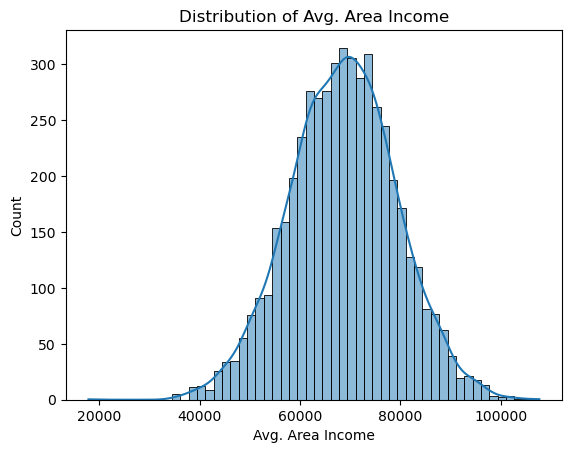

In [7]:
sns.histplot(data= df, x=   "Avg. Area Income", kde= True)
plt.title("Distribution of Avg. Area Income");

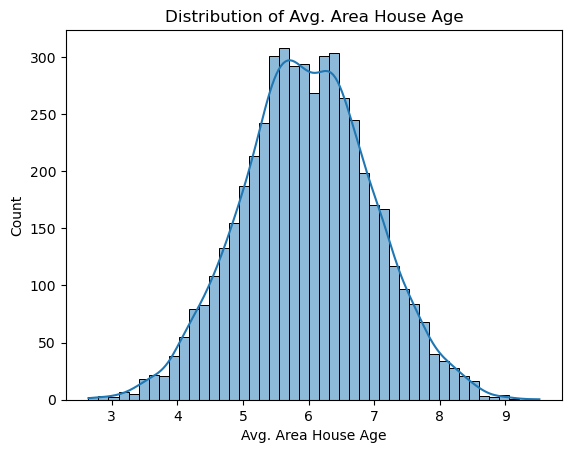

In [8]:
sns.histplot(data= df, x=   "Avg. Area House Age", kde= True)
plt.title("Distribution of Avg. Area House Age");

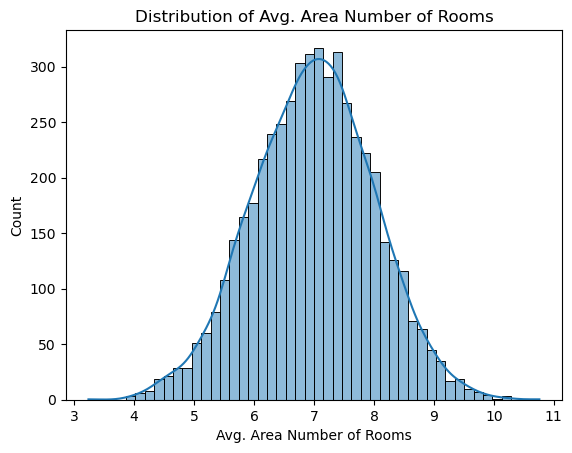

In [10]:
sns.histplot(data= df, x=   "Avg. Area Number of Rooms", kde= True)
plt.title("Distribution of Avg. Area Number of Rooms");

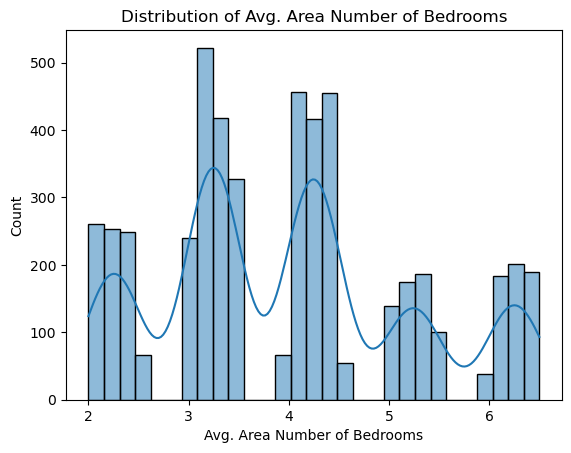

In [12]:
sns.histplot(data= df, x=   "Avg. Area Number of Bedrooms", kde= True)
plt.title("Distribution of Avg. Area Number of Bedrooms");

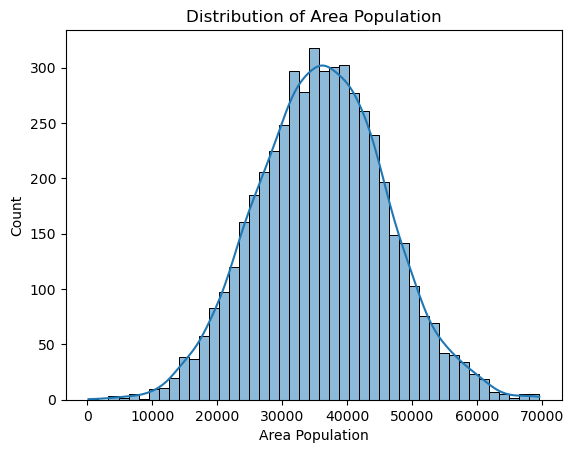

In [13]:
sns.histplot(data= df, x=   "Area Population", kde= True)
plt.title("Distribution of Area Population");

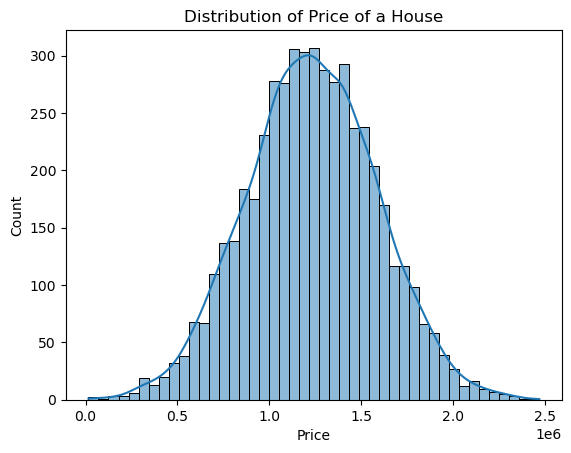

In [14]:
sns.histplot(data= df, x=   "Price", kde= True)
plt.title("Distribution of Price of a House");

* All the numerical features of the dataset exhibit normal distribution which is bell-shaped curve.

* The highest point represents the mean of the distribution. 

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

Text(0.5, 1.0, 'Scatter Plot of Avg. Area Income and Price of a House')

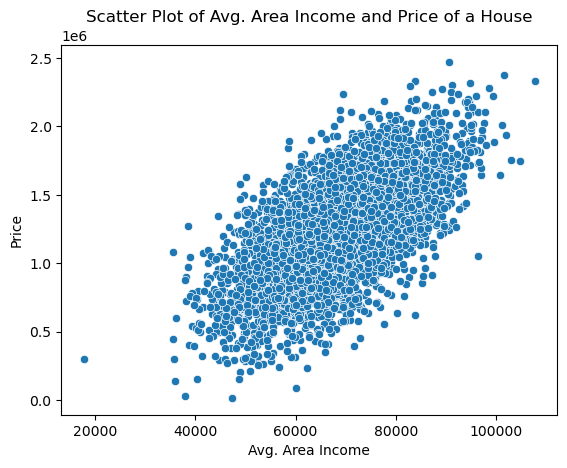

In [20]:
sns.scatterplot(data = df, x = "Avg. Area Income", y= "Price")
plt.title("Scatter Plot of Avg. Area Income and Price of a House")

Text(0.5, 1.0, 'Scatter Plot of Avg. Area House Age and Price of a House')

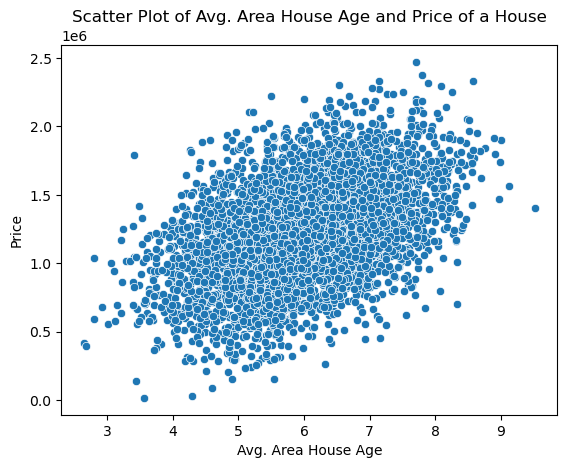

In [21]:
sns.scatterplot(data = df, x = "Avg. Area House Age", y= "Price")
plt.title("Scatter Plot of Avg. Area House Age and Price of a House")

Text(0.5, 1.0, 'Scatter Plot of Avg. Area Number of Rooms and Price of a House')

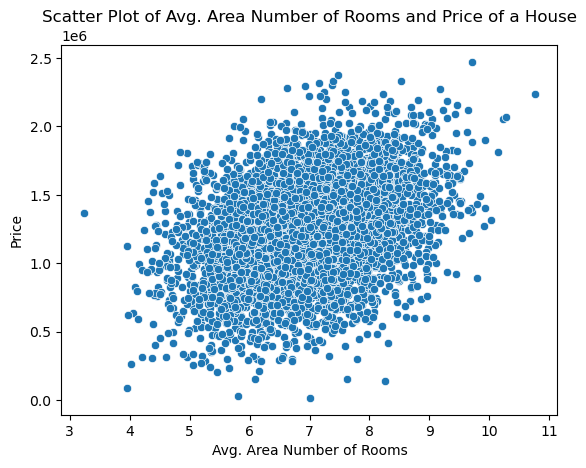

In [22]:
sns.scatterplot(data = df, x = "Avg. Area Number of Rooms", y= "Price")
plt.title("Scatter Plot of Avg. Area Number of Rooms and Price of a House")

Text(0.5, 1.0, 'Scatter Plot of Avg. Area Number of Bedroom of a House')

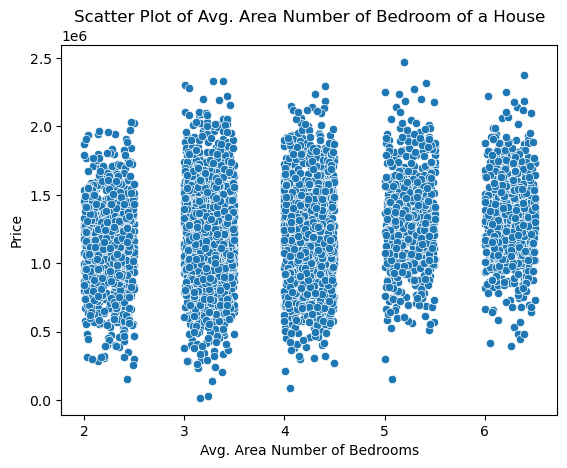

In [24]:
sns.scatterplot(data = df, x = "Avg. Area Number of Bedrooms", y= "Price")
plt.title("Scatter Plot of Avg. Area Number of Bedroom of a House")

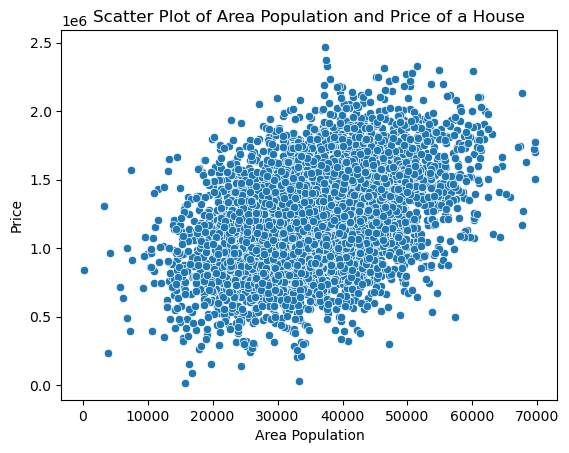

In [45]:
sns.scatterplot(data = df, x = "Area Population", y= "Price")
plt.title("Scatter Plot of Area Population and Price of a House");

* Almost all the features in the dataset are scattered at the middle of the scatterplot. 
* The concentration of points at the middle part of the scatterplot  suggest that; 
  * the values of the variaiables are relatively homogeneous. 
  * the majority of the values are clustered around the central tendency (mean, median and mode)
* There are however some few outliers which are distant from the clustered points 

**Plot the correlation heatmap and list your observations.**

<Axes: >

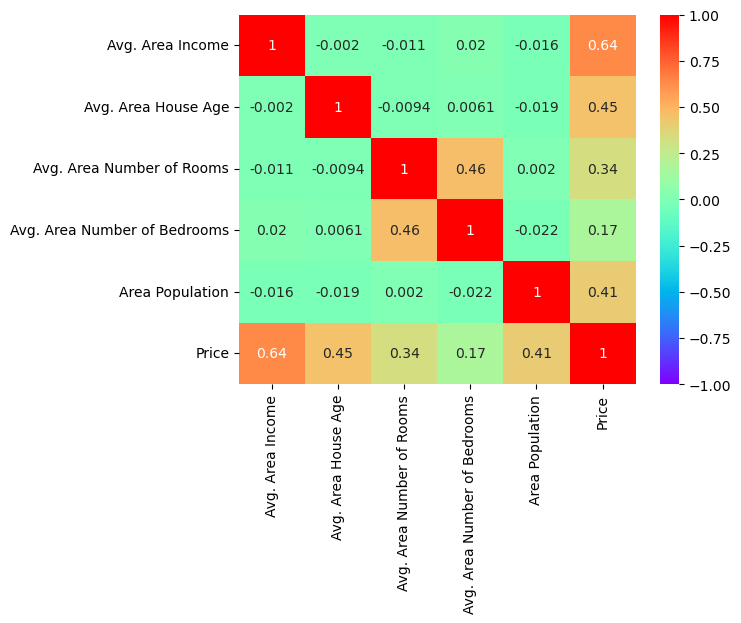

In [44]:
# selecting the numerical data type 
numerical_df= df.select_dtypes(include = "number")

# ploting the correlation heatmap
sns.heatmap(data= numerical_df.corr(), cmap= "rainbow", vmin= -1, vmax=1, annot= True )

* There is a strong positive correlation (64%) between Average area income and price of house.

* Average area house age and Price of a house also established some postive correlation which is about 45%

* Average area number of bedrooms also has positive relationship with average area number of rooms which is about 46%. However, the relationship is not much stronger to lead to multicollinearity


### Select the input and output featues for building the model

In [39]:
# Selecting the input features 
x= df.drop(["Price", "Address"], axis = 1)

# selecting the output feature/target
y= df["Price"]

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [40]:
# importing the function to split the data
from sklearn.model_selection import train_test_split

# splitting the data
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 27)

In [41]:
# checking the dimension of the train and test data

print(f"Training shape: {x_train.shape}")

print(f"Testing shape: {x_test.shape}")


Training shape: (3500, 5)
Testing shape: (1500, 5)


### Model Building

**Normilize or standardize the training and test data**

In [42]:
# importing the standardscaler function to normilize the data 
from sklearn.preprocessing import StandardScaler

# creating an instance of the standard scaler class
scale = StandardScaler()

x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

**Fit the model to the training set**

In [43]:
# importing the linear regression algorithm
from sklearn.linear_model import LinearRegression

# creating an instance of the Linear Regression
linear_model = LinearRegression()

# fitting the model
linear_model.fit(x_train_scaled, y_train)


LinearRegression()

In [51]:
# predicting the training and testing data 
x_pred =linear_model.predict(x_train_scaled)
y_pred = linear_model.predict(x_test_scaled)

**Get the score on training set**

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2T = r2_score(y_train, x_pred)

print(f"R squared of Training data: {R2T:.2f}")


R squared of Training data: 0.92


**Write your own function for the R-squared score.**

In [59]:
def calculate_r2(target, _pred):
    r2= r2_score(y_test, y_pred)
    print(f"R-Squared of testing data:, {r2:.2f}")
 

**Get the score on test set**

In [60]:
calculate_r2(y_test, y_pred)

R-Squared of testing data:, 0.91


**Get the RMSE on test set**

In [61]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE:, {RMSE:.2f}")

RMSE:, 103486.05


**Get the model coefficients.**

In [62]:
linear_model.coef_

array([232183.75092574, 163666.35209652, 123020.04976599,   1008.7640328 ,
       152356.50779292])

* The coefficients are the contribution of each of the features to the model performance
* With all other features remained unchanged, a unit change in the average area income will result in prices of houses being increased by 232183.75 dollars 
* This applies to all the other variables(input features) by holding the other variables constant

**Automate the equation of the fit**

In [63]:
coefficient = linear_model.coef_
intercept = linear_model.intercept_

# Printing the equation of the fit

equation = f"Equation of the fit: y = {intercept:.2f} + "
for i, coefficient in enumerate(coefficient):
    equation += f"{coefficient:.2f} * x{i+1} + "

print(equation[:-2])

Equation of the fit: y = 1234683.68 + 232183.75 * x1 + 163666.35 * x2 + 123020.05 * x3 + 1008.76 * x4 + 152356.51 * x5 
